In [68]:
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import GRU, LSTM
from keras.models import Sequential, load_model

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
import matplotlib.style
matplotlib.style.use("ggplot")

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [72]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import DataReader
from datetime import datetime

In [73]:
def load_data_df(dataset_dir, separator=',', date_column='date'):
    loaded_df = pd.read_csv(dataset_dir, sep=separator)
    loaded_df.drop_duplicates(subset=date_column, inplace=True)
    loaded_df.dropna(inplace=True)
    return loaded_df

In [74]:
data = load_data_df('../data/BLK.csv', separator=',', date_column='Date' )
data.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04 14:31:00+00:00,333.040,333.310,333.04,333.30,300.0
1,2016-01-04 14:32:00+00:00,332.100,332.100,332.10,332.10,200.0
2,2016-01-04 14:33:00+00:00,331.760,332.735,330.55,330.56,8975.0
3,2016-01-04 14:34:00+00:00,331.000,331.090,330.56,330.56,1089.0
4,2016-01-04 14:35:00+00:00,330.845,331.195,329.58,329.58,3000.0


In [75]:
# selecting YHOO stocks
# data = prices[prices['symbol']=='YHOO']

# preparing input features
# data = data.drop(['symbol'], axis=1)
data = data.drop(['Volume'], axis=1)
data = data[['Open', 'Low', 'High', 'Close']]

# preparing label data
data_shift = data.shift(-1)
label = data_shift['Close']

# adjusting the shape of both
data.drop(data.index[len(data)-1], axis=0, inplace=True)
label.drop(label.index[len(label)-1], axis=0, inplace=True)

In [76]:
data.shape

(258027, 4)

In [77]:
split_idx = 2200

In [78]:
# conversion to numpy array
X_train, y_train = data.values[:split_idx, :], label.values[:split_idx]
y_train = y_train.reshape(-1, 1)

# scaling values for model
x_scale = MinMaxScaler()
y_scale = MinMaxScaler()

# training data
X_train = x_scale.fit_transform(X_train)
X_train = X_train.reshape((-1,1,4))
y_train = y_scale.fit_transform(y_train)

# CNN Model

In [57]:
from keras.layers import Conv1D
from keras.layers import Flatten


model_name = 'stock_price_CNN'

seq_length = 64


model = Sequential()
# TODO ADD LSTM
model.add(Conv1D(64, 1, activation='relu', input_shape=(1, 4)))
model.add(Dropout(0.2))
#model.add(Dense(1, activation='relu'))
model.add(Flatten())
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, batch_size=250, epochs=250, validation_split=0.1, verbose=1, shuffle=True)

Train on 1980 samples, validate on 220 samples
Epoch 1/250
1980/1980 [==============================] - 1s 350us/step - loss: 0.6058 - val_loss: 0.0069
Epoch 2/250
1980/1980 [==============================] - 0s 8us/step - loss: 0.4815 - val_loss: 0.0035
Epoch 3/250
1980/1980 [==============================] - 0s 8us/step - loss: 0.3731 - val_loss: 0.0015
Epoch 4/250
1980/1980 [==============================] - 0s 9us/step - loss: 0.2801 - val_loss: 5.6130e-04
Epoch 5/250
1980/1980 [==============================] - 0s 8us/step - loss: 0.1965 - val_loss: 8.9969e-04
Epoch 6/250
1980/1980 [==============================] - 0s 8us/step - loss: 0.1299 - val_loss: 0.0026
Epoch 7/250
1980/1980 [==============================] - 0s 8us/step - loss: 0.0779 - val_loss: 0.0058
Epoch 8/250
1980/1980 [==============================] - 0s 8us/step - loss: 0.0425 - val_loss: 0.0100
Epoch 9/250
1980/1980 [==============================] - 0s 8us/step - loss: 0.0213 - val_loss: 0.0144
Epoch 10/250
198

In [58]:
print(X_train.shape)



(2200, 1, 4)


In [59]:
# test data
X_test = data.values[split_idx:, :]

X_test = x_scale.transform(X_test)
X_test = X_test.reshape((-1,1,4))

In [60]:
X_test.shape

(255827, 1, 4)

In [61]:
y_test = label.values[split_idx:].reshape(-1, 1)
score = model.evaluate(X_test, y_test)
print('Score: {}'.format(score))

255827/255827 [==============================] - 3s 11us/step
Score: 178353.3074437877


In [62]:
model.predict(X_train)

# predict
yhat = model.predict(X_test)
yhat = np.array(yhat).reshape(-1, 1)
yhat = y_scale.inverse_transform(yhat)

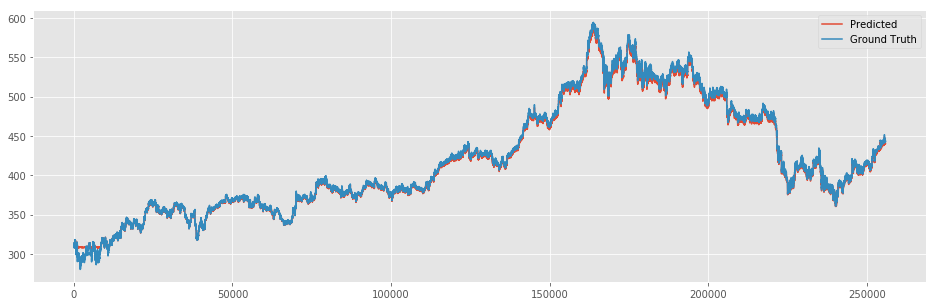

In [63]:
# plot
plt.figure(figsize=(16, 5))
plt.plot(yhat, label='Predicted')
plt.plot(y_test, label='Ground Truth')
plt.legend();

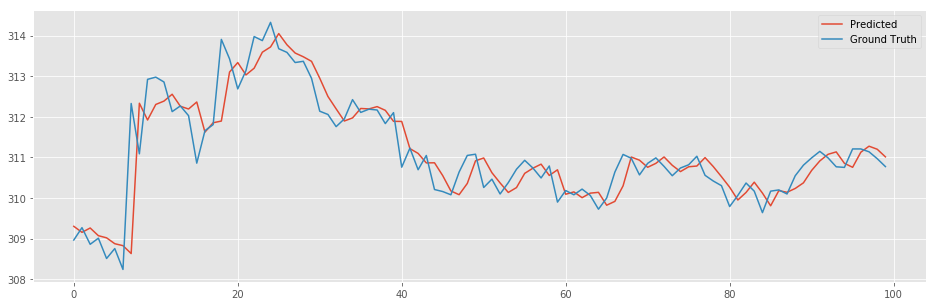

In [64]:
plt.figure(figsize=(16, 5))
plt.plot(yhat[:100], label='Predicted')
plt.plot(y_test[:100], label='Ground Truth')
plt.legend();

# Test on different stock

In [90]:
new_data = load_data_df('../data/TSLA.csv', separator=',', date_column='Date' )
new_data.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04 14:31:00+00:00,230.720,231.32,229.02,231.045,127249.0
1,2016-01-04 14:32:00+00:00,231.180,231.38,230.35,230.710,46577.0
2,2016-01-04 14:33:00+00:00,230.710,231.29,230.41,231.050,41492.0
3,2016-01-04 14:34:00+00:00,231.086,231.23,230.01,230.280,29712.0
4,2016-01-04 14:35:00+00:00,230.520,230.82,229.51,230.410,47301.0


In [91]:
# selecting YHOO stocks
# data = prices[prices['symbol']=='YHOO']

# preparing input features
# data = data.drop(['symbol'], axis=1)
new_data = new_data.drop(['Volume'], axis=1)
new_data = new_data[['Open', 'Low', 'High', 'Close']]

# preparing label data
new_data_shift = new_data.shift(-1)
new_label = new_data_shift['Close']

# adjusting the shape of both
new_data.drop(new_data.index[len(new_data)-1], axis=0, inplace=True)
new_label.drop(new_label.index[len(new_label)-1], axis=0, inplace=True)

In [92]:
new_data = x_scale.transform(new_data)
new_data = new_data.reshape((-1,1,4))

In [94]:
y_test = new_label.values[:].reshape(-1, 1)
score = model.evaluate(new_data, y_test)
print('Score: {}'.format(score))

308483/308483 [==============================] - 3s 10us/step
Score: 82486.48569013021


In [95]:
model.predict(new_data)

# predict
yhat = model.predict(new_data)
yhat = np.array(yhat).reshape(-1, 1)
yhat = y_scale.inverse_transform(yhat)

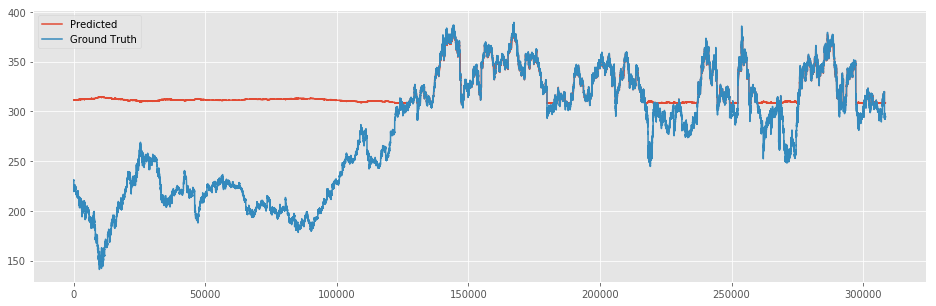

In [96]:
# plot
plt.figure(figsize=(16, 5))
plt.plot(yhat, label='Predicted')
plt.plot(y_test, label='Ground Truth')
plt.legend();

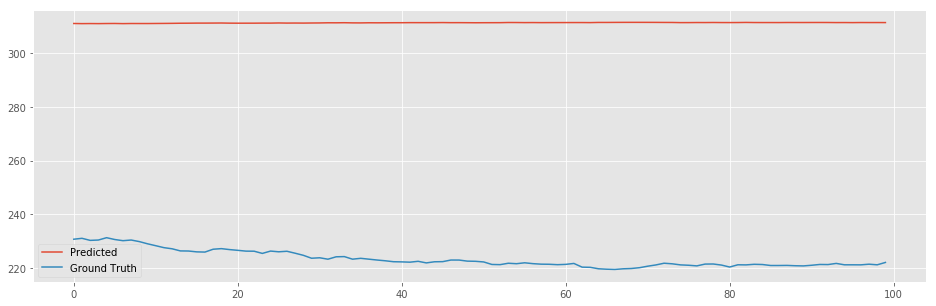

In [97]:
plt.figure(figsize=(16, 5))
plt.plot(yhat[:100], label='Predicted')
plt.plot(y_test[:100], label='Ground Truth')
plt.legend();